In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'

Mounted at /content/drive


## Exercise
- 각자 준비한 사진을 불러와서 관심있는 대상의 숫자를 셀 수 있는 알고리즘을 morphological processing을 기반으로 구현해보자.
- 배운 내용들을 적절하게 활용하여 개수를 세는 알고리즘의 정확도를 높여보자.

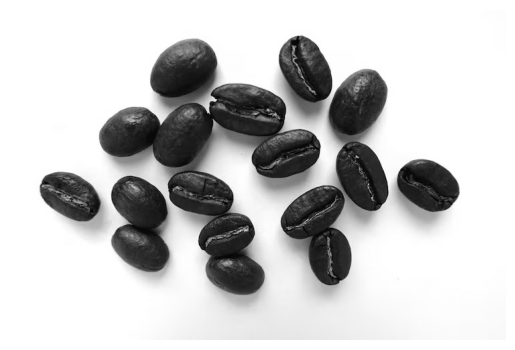

In [96]:
f = Image.open('coffee.jpeg').convert('L')
f = np.array(f)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

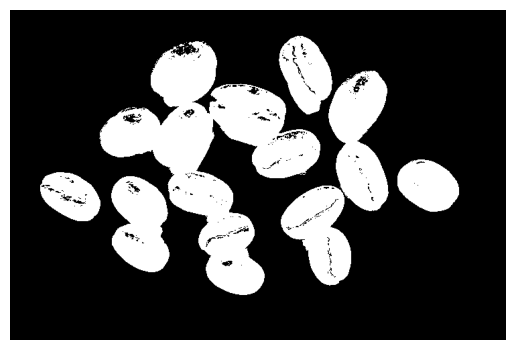

In [97]:
A = f<120
plt.imshow(A,cmap='gray')
plt.axis('off')
plt.show()

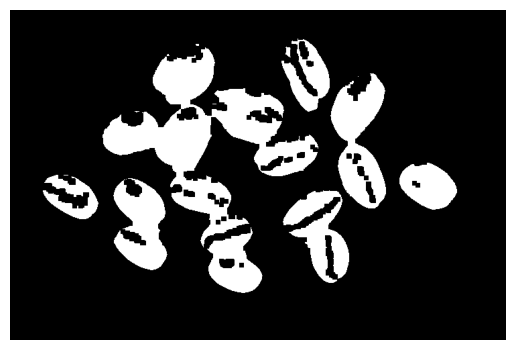

In [98]:
A = nd.binary_opening(A, np.ones((3,3)))
A_er = nd.binary_erosion(A, np.ones((7,7)))
plt.imshow(A_er,cmap='gray')
plt.axis('off')
plt.show()

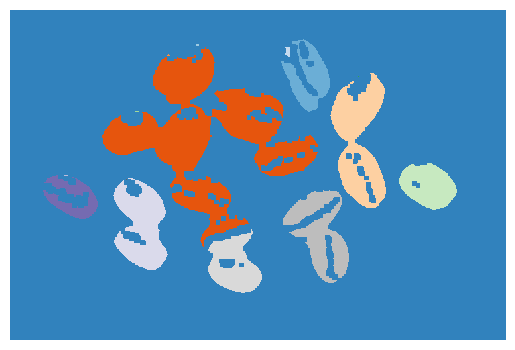

  17개가 맞나요?


In [99]:
l, m = nd.label(A_er)
plt.imshow(l,interpolation='nearest',cmap='tab20c')
plt.axis('off')
plt.show()
print(f'  {m}개가 맞나요?')

In [105]:
cc = np.zeros((m-1,2))
for i in range(1, m):
    cc[i-1,0] = i
    cc[i-1,1] = np.sum(l == i)
    print(f'index: {int(cc[i-1,0])}, number of pixels: {int(cc[i-1,1])}')

index: 1, number of pixels: 3589
index: 2, number of pixels: 14
index: 3, number of pixels: 86
index: 4, number of pixels: 27488
index: 5, number of pixels: 9
index: 6, number of pixels: 8808
index: 7, number of pixels: 1
index: 8, number of pixels: 6
index: 9, number of pixels: 9
index: 10, number of pixels: 4150
index: 11, number of pixels: 2456
index: 12, number of pixels: 7
index: 13, number of pixels: 6764
index: 14, number of pixels: 1
index: 15, number of pixels: 2
index: 16, number of pixels: 6233


In [106]:
ind_max = np.argmax(cc[:,1])
ind_min = np.argmin(cc[:,1])

print(f'\nthe largest component: index {int(cc[ind_max,0])}, # of pixels: {int(cc[ind_max,1])}')
print(f'the smallest component: index {int(cc[ind_min,0])}, # of pixels: {int(cc[ind_min,1])}')


the largest component: index 4, # of pixels: 27488
the smallest component: index 7, # of pixels: 1


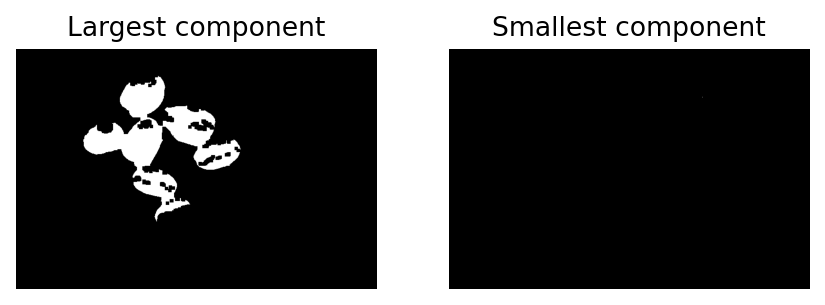

In [108]:
plt.figure(dpi=160)

plt.subplot(121)
plt.imshow(l == cc[ind_max,0], cmap='gray')
plt.axis('off')
plt.title(f'Largest component')

plt.subplot(122)
plt.imshow(l == cc[ind_min,0], cmap='gray')
plt.axis('off')
plt.title(f'Smallest component')

plt.show()